In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm.notebook import tqdm
import pickle 

%matplotlib inline

In [2]:
final_data = pd.read_csv('../data/teis_final_data.csv')

In [3]:
final_data.head()

,Child ID,Notification Date,Fiscal Year,Notification Month,Tenn Region,Fiscal Year.1,third_DOB,Late Referral,Qtr,POE,...,Service Coordinator,Parent Consent,Initial Eligibility,Initial Eligibility Date,Initial IFSP Date,Latest IFSP,Exit Reason,Exit Date,Referral Source Type Name,Year
0,104085,2018-01-20,2017-2018,Jan,Middle,2017.0,2010-07-07,1.0,3.0,GN,...,NaN,NaN,NaN,NaN,NaN,NaN,Unable to contact,2010-01-25,DCS,2018
1,350065,2016-08-17,2016-2017,Aug,Middle,2016.0,2016-10-15,1.0,1.0,UC,...,Steven Scarlett,NaN,NaN,NaN,NaN,NaN,Unable to contact,2016-08-31,PCP,2016
2,351755,2016-07-12,2016-2017,Jul,Western,2016.0,2016-11-13,NaN,1.0,NW,...,Rene Bard,2016-07-12,Ineligible,8/25/2016,NaN,NaN,Ineligible for Part C,2016-08-25,Parent,2016
3,353800,2016-09-14,2016-2017,Sep,Eastern,2016.0,2016-10-01,1.0,1.0,FT,...,Jennifer Terranera - 45 days,NaN,NaN,NaN,NaN,NaN,Referral less than 45 days,2016-09-15,Parent,2016
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,10/10/2016,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016


In [4]:
final_data.columns = [
    col.strip().lower().replace(' ', '_').replace('.', '_') 
    for col in 
    final_data.columns]
final_data.dtypes

child_id                       int64
notification_date             object
fiscal_year                   object
notification_month            object
tenn_region                   object
fiscal_year_1                float64
third_dob                     object
late_referral                float64
qtr                          float64
poe                           object
dob                           object
county_name                   object
county_ses                    object
child_phase                   object
active                        object
service_coordinator           object
parent_consent                object
initial_eligibility           object
initial_eligibility_date      object
initial_ifsp_date             object
latest_ifsp                   object
exit_reason                   object
exit_date                     object
referral_source_type_name     object
year                           int64
dtype: object

In [5]:
final_data.columns

Index(['child_id', 'notification_date', 'fiscal_year', 'notification_month',
       'tenn_region', 'fiscal_year_1', 'third_dob', 'late_referral', 'qtr',
       'poe', 'dob', 'county_name', 'county_ses', 'child_phase', 'active',
       'service_coordinator', 'parent_consent', 'initial_eligibility',
       'initial_eligibility_date', 'initial_ifsp_date', 'latest_ifsp',
       'exit_reason', 'exit_date', 'referral_source_type_name', 'year'],
      dtype='object')

### Average age of referrals by POE

In [6]:
final_data['initial_ifsp_date'] = pd.to_datetime(final_data['initial_ifsp_date'])
final_data['notification_date'] = pd.to_datetime(final_data['notification_date'])
final_data['dob'] = pd.to_datetime(final_data['dob'])
final_data.dtypes

child_id                              int64
notification_date            datetime64[ns]
fiscal_year                          object
notification_month                   object
tenn_region                          object
fiscal_year_1                       float64
third_dob                            object
late_referral                       float64
qtr                                 float64
poe                                  object
dob                          datetime64[ns]
county_name                          object
county_ses                           object
child_phase                          object
active                               object
service_coordinator                  object
parent_consent                       object
initial_eligibility                  object
initial_eligibility_date             object
initial_ifsp_date            datetime64[ns]
latest_ifsp                          object
exit_reason                          object
exit_date                       

In [106]:
avg_age_ref = final_data[['dob', 'referral_source_type_name', 'county_ses', 'poe', 'notification_date', 'initial_ifsp_date','fiscal_year']]
avg_age_ref['notification_age'] = avg_age_ref['notification_date']- avg_age_ref['dob']
avg_age_ref

C:\Users\dkham\AppData\Local\Temp/ipykernel_139212/4242144274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_age_ref['notification_age'] = avg_age_ref['notification_date']- avg_age_ref['dob']


,dob,referral_source_type_name,county_ses,poe,notification_date,initial_ifsp_date,fiscal_year,notification_age
0,2007-07-07,DCS,Competitive,GN,2018-01-20,NaT,2017-2018,3850 days
1,2013-10-15,PCP,At-Risk,UC,2016-08-17,NaT,2016-2017,1037 days
2,2013-11-13,Parent,Transitional,NW,2016-07-12,NaT,2016-2017,972 days
3,2013-10-01,Parent,At-Risk,FT,2016-09-14,NaT,2016-2017,1079 days
4,2013-12-04,Dept. of Health,Transitional,UC,2016-08-05,2016-10-10,2016-2017,975 days
...,...,...,...,...,...,...,...,...
115519,2020-05-20,PCP,Transitional,GN,2022-07-01,NaT,NaN,772 days
115520,2021-12-07,PCP,Competitive,GN,2022-07-01,NaT,NaN,206 days
115521,2022-06-21,Other Health Care Provider,Transitional,GN,2022-07-01,NaT,NaN,10 days
115522,2022-06-17,Hospital,Competitive,GN,2022-07-01,NaT,NaN,14 days


In [107]:
poe_avg_age_ref = avg_age_ref.groupby(['poe','fiscal_year'])['notification_age'].mean().to_frame().reset_index()
poe_avg_age_ref

,poe,fiscal_year,notification_age
0,ET,2016-2017,435 days 09:15:30.028598664
1,ET,2017-2018,427 days 00:57:37.039711192
2,ET,2018-2019,463 days 17:41:10.826306912
3,ET,2019-2020,456 days 08:56:25.218165624
4,ET,2020-2021,451 days 10:55:28.591749648
5,ET,2021-2022,475 days 07:35:07.772020728
6,FT,2016-2017,417 days 01:05:48.639825896
7,FT,2017-2018,419 days 13:31:04.031620552
8,FT,2018-2019,427 days 20:09:07.015293536
9,FT,2019-2020,418 days 12:33:41.327529920


In [108]:
poe_avg_age_ref = poe_avg_age_ref.rename(columns = {'notification_age':'avg_age_months'})
poe_avg_age_ref['avg_age_months'] = poe_avg_age_ref['avg_age_months'].dt.days
poe_avg_age_ref

,poe,fiscal_year,avg_age_months
0,ET,2016-2017,435
1,ET,2017-2018,427
2,ET,2018-2019,463
3,ET,2019-2020,456
4,ET,2020-2021,451
5,ET,2021-2022,475
6,FT,2016-2017,417
7,FT,2017-2018,419
8,FT,2018-2019,427
9,FT,2019-2020,418


In [109]:
poe_avg_age_ref['avg_age_months'] = pd.to_numeric(poe_avg_age_ref['avg_age_months'])
poe_avg_age_ref['avg_age_months'] = poe_avg_age_ref['avg_age_months']*0.032855
poe_avg_age_ref

,poe,fiscal_year,avg_age_months
0,ET,2016-2017,14.291925
1,ET,2017-2018,14.029085
2,ET,2018-2019,15.211865
3,ET,2019-2020,14.981880
4,ET,2020-2021,14.817605
5,ET,2021-2022,15.606125
6,FT,2016-2017,13.700535
7,FT,2017-2018,13.766245
8,FT,2018-2019,14.029085
9,FT,2019-2020,13.733390


In [114]:
MD_avg_age_ref = poe_avg_age_ref.loc[poe_avg_age_ref['poe']=='MD']
MD_avg_age_ref

,poe,fiscal_year,avg_age_months
18,MD,2016-2017,15.638980
19,MD,2017-2018,15.080445
20,MD,2018-2019,15.408995
21,MD,2019-2020,15.343285
22,MD,2020-2021,14.423345
23,MD,2021-2022,16.263225


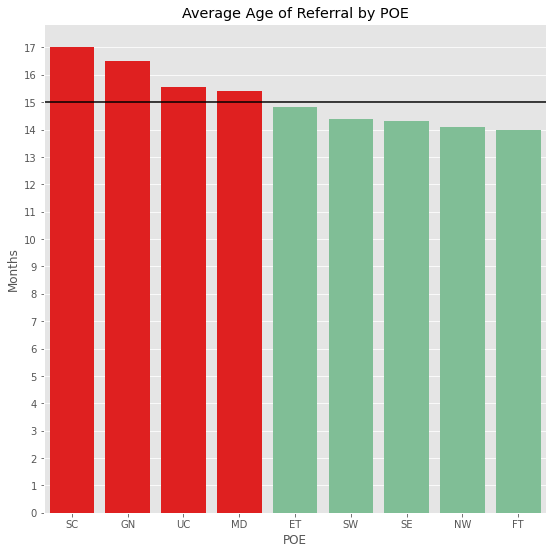

In [99]:
#c= ['red' if (x > 15)
   #else "green" 
   # for x in y]#poe_avg_age_ref.avg_age_months]

fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x = poe_avg_age_ref.poe, y = poe_avg_age_ref.avg_age_months,
             palette= ['red','red','red','red','#76C893','#76C893','#76C893','#76C893','#76C893'], 
            order=poe_avg_age_ref.sort_values('avg_age_months',ascending=False)['poe'])
           
plt.title('Average Age of Referral by POE')
#plt.style.use('ggplot')
plt.xlabel('POE')
plt.ylabel('Months')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.axhline(15, color = 'black')


plt.savefig('avg_age_referral', transparent = True);

### Percent of total referrals resulting in an IFSP by POE

In [33]:
ifsp_count = final_data.loc[final_data['child_phase'] == 'IFSP']
ifsp_count = ifsp_count.groupby(ifsp_count['poe']).count().sort_values(by = 'child_id', ascending = False)
ifsp_count = ifsp_count.drop(columns = ['notification_date', 'fiscal_year', 'notification_month',
       'tenn_region', 'fiscal_year_1', 'third_dob', 'late_referral', 'qtr', 'dob', 'county_name', 'county_ses', 'active',
       'service_coordinator', 'parent_consent', 'initial_eligibility', 'child_phase',
       'initial_eligibility_date', 'initial_ifsp_date', 'latest_ifsp',
       'exit_reason', 'exit_date', 'referral_source_type_name', 'year'])
ifsp_count = ifsp_count.rename(columns = {'poe':'POE', 'child_id':'perc_IFSP_of_total'})
ifsp_count_percentage = ((ifsp_count/ifsp_count.sum())*100)
ifsp_count_percentage

,perc_IFSP_of_total
poe,
ET,16.757837
GN,16.474439
SC,15.402359
MD,13.352666
FT,10.384675
UC,9.958479
SE,7.526527
SW,5.527362
NW,4.615655


In [40]:
ifsp = final_data.groupby(['poe','child_phase'])['child_id'].count().to_frame()
ifsp = ifsp.rename(columns = {'child_id':'count'})
ifsp['total_children'] = ifsp.groupby('poe')['count'].transform(sum)
ifsp = ifsp.reset_index()
ifsp

,poe,child_phase,count,total_children
0,ET,Eligibility,5544,20583
1,ET,Evaluation,624,20583
2,ET,IFSP,7628,20583
3,ET,Notification,6275,20583
4,ET,Referral,246,20583
5,ET,Screening,266,20583
6,FT,Eligibility,2789,11335
7,FT,Evaluation,303,11335
8,FT,IFSP,4727,11335
9,FT,Notification,3444,11335


In [42]:
ifsp = ifsp.loc[ifsp['child_phase']=='IFSP']
ifsp['perc_total'] = (ifsp['count']/ifsp['total_children'])*100
perc_ifsp_total = ifsp.drop(columns = ['child_phase'])
perc_ifsp_total = perc_ifsp_total.reset_index()
perc_ifsp_total


,index,poe,count,total_children,perc_total
0,2,ET,7628,20583,37.059709
1,8,FT,4727,11335,41.702691
2,14,GN,7499,20239,37.052226
3,20,MD,6078,17642,34.451876
4,26,NW,2101,6592,31.871966
5,32,SC,7011,14967,46.843055
6,38,SE,3426,8790,38.976109
7,44,SW,2516,6142,40.963855
8,50,UC,4533,9234,49.090318


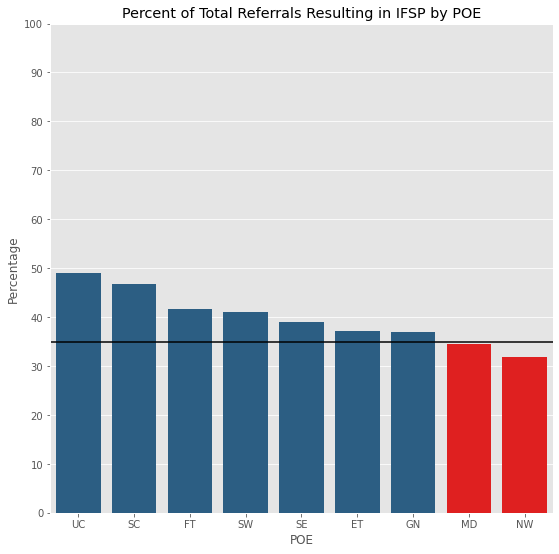

In [105]:
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x = perc_ifsp_total.poe, y = perc_ifsp_total.perc_total,
              palette= ['#1E6091','#1E6091','#1E6091','#1E6091','#1E6091','#1E6091','#1E6091','red','red'], 
            order=perc_ifsp_total.sort_values('perc_total',ascending=False)['poe'])
           
plt.title('Percent of Total Referrals Resulting in IFSP by POE')
plt.style.use('ggplot')
plt.xlabel('POE')
plt.ylabel('Percentage')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.axhline(35, color = 'black')

plt.savefig('total_referrals_ifsp', transparent = True);

### Percent of eligibile referrals resulting in an IFSP by POE 

In [48]:
eligible = final_data.loc[final_data['initial_eligibility'] == 'Eligible']
eligible

,child_id,notification_date,fiscal_year,notification_month,tenn_region,fiscal_year_1,third_dob,late_referral,qtr,poe,...,service_coordinator,parent_consent,initial_eligibility,initial_eligibility_date,initial_ifsp_date,latest_ifsp,exit_reason,exit_date,referral_source_type_name,year
4,353805,2016-08-05,2016-2017,Aug,Middle,2016.0,2016-12-04,NaN,1.0,UC,...,Anna Bolin,2016-08-15,Eligible,10/5/2016,2016-10-10,NaN,618 - Part B eligibility not determined,2016-12-03,Dept. of Health,2016
8,354276,2016-08-04,2016-2017,Aug,Eastern,2016.0,2016-12-24,NaN,1.0,ET,...,Kristi Borer,2016-08-12,Eligible,9/7/2016,2016-09-22,9/22/2016,618 - Parent withdraw,2016-09-22,DCS,2016
15,358011,2016-10-21,2016-2017,Oct,Eastern,2016.0,2017-02-02,NaN,2.0,ET,...,Karen Stock,2016-10-24,Eligible,12/19/2014,2015-06-26,1/12/2017,618 - Part B eligible,2017-02-01,Parent,2016
16,358031,2016-08-10,2016-2017,Aug,Eastern,2016.0,2017-01-14,NaN,1.0,FT,...,Jennifer Terranera,2016-08-31,Eligible,9/12/2016,2016-09-20,10/18/2016,618 - Part B eligible,2017-01-13,PCP,2016
17,358159,2016-07-25,2016-2017,Jul,Eastern,2016.0,2017-01-22,NaN,1.0,FT,...,Barbara Bowman,NaN,Eligible,2/17/2016,NaT,NaN,Unable to contact,2016-08-08,PCP,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114901,530863,2022-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ET,...,Rose DuPont,2022-06-22,Eligible,6/22/2022,NaT,NaN,NaN,NaN,PCP,2022
114940,530920,2022-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ET,...,Adrianne McPeake,2022-06-24,Eligible,6/28/2022,NaT,NaN,NaN,NaN,PCP,2022
115011,530995,2022-06-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ET,...,Adrianne McPeake,2022-06-28,Eligible,6/30/2022,NaT,NaN,NaN,NaN,PCP,2022
115106,531103,2022-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ET,...,Kaitlin Lippert,2022-06-28,Eligible,6/30/2022,NaT,NaN,NaN,NaN,PCP,2022


In [49]:
eligible['child_phase'].value_counts()

IFSP           45499
Eligibility     8363
Name: child_phase, dtype: int64

In [50]:
eligible_by_poe = eligible.groupby(['poe','child_phase'])['child_id'].count()
eligible_by_poe = eligible_by_poe.to_frame() 
eligible_by_poe = eligible_by_poe.rename(columns ={'child_id':'count'})
eligible_by_poe['total_children'] = eligible_by_poe.groupby('poe')['count'].transform(sum)
eligible_by_poe = eligible_by_poe.reset_index()

In [51]:
eligible_by_poe = eligible_by_poe.loc[eligible_by_poe['child_phase']=='IFSP']
eligible_by_poe['perc_total'] = (eligible_by_poe['count']/eligible_by_poe['total_children'])*100
perc_eligibile_ifsp_by_poe = eligible_by_poe.drop(columns =['child_phase'])
perc_eligibile_ifsp_by_poe

,poe,count,total_children,perc_total
1,ET,7624,9092,83.853938
3,FT,4725,5858,80.658928
5,GN,7491,8740,85.709382
7,MD,6077,7099,85.603606
9,NW,2098,2572,81.570762
11,SC,7009,7952,88.141348
13,SE,3426,4367,78.452027
15,SW,2516,3073,81.874390
17,UC,4533,5109,88.725778


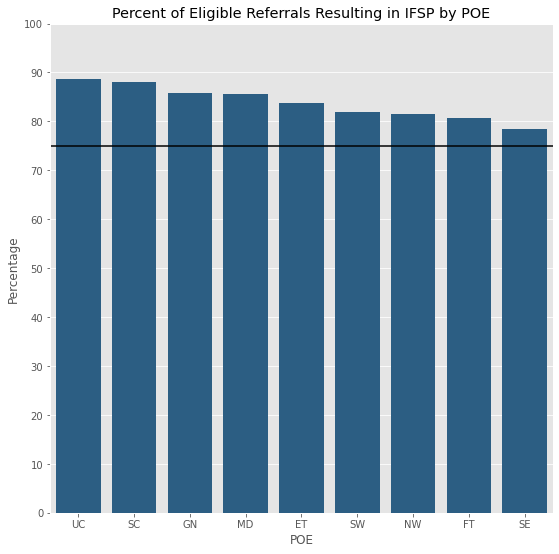

In [102]:
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x = perc_eligibile_ifsp_by_poe.poe, y = perc_eligibile_ifsp_by_poe.perc_total,
             color= '#1E6091', order=perc_eligibile_ifsp_by_poe.sort_values('perc_total',ascending=False)['poe'])
           
plt.title('Percent of Eligible Referrals Resulting in IFSP by POE')
plt.style.use('ggplot')
plt.xlabel('POE')
plt.ylabel('Percentage')
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.axhline(75, color = 'black')

plt.savefig('eligible_ref_ifsp', transparent = True);